### MUSCLEHUB GYM
Musclehub is a fancy gym and Currently, when a visitor to MuscleHub is considering buying a membership, he or she follows the following steps:

 1. Take a fitness test with a personal trainer

 2. Fill out an application for the gym

 3. Send in their payment for their first month’s membership
 
 Janet, the manager of MuscleHub, thinks that the fitness test intimidates some prospective members, so she has set up an A/B test.

Visitors will randomly be assigned to one of two groups:

- Group A will still be asked to take a fitness test with a personal trainer

- Group B will skip the fitness test and proceed directly to the application

Janet’s hypothesis is that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub.

My job is to help her analyze the data and create a presentation.

In [7]:
# importing the python libraries used for this project
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

MuscleHub uses a RDBMS with a total of 4 tables to be used in our investigation;
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

In [10]:

df1 = sqlite3.connect(r'C:\Users\User\Desktop\language\DATA JOURNEY\python\Data visualization_&_stats\Datasets\muscle_hub_project\musclehub_dbbrowser.db')
cursor = df1.cursor()
cursor.execute('''SELECT * FROM visits;''')
cursor.execute('''SELECT * FROM fitness_tests;''')
cursor.execute('''SELECT * FROM applications;''')
cursor.execute('''SELECT * FROM purchases;''')

#Joining and Converting the RDBMS to a DataFrame for wrangling and Visualization
df = pd.read_sql_query('''SELECT visits.first_name, 
visits.last_name, 
visits.gender, 
visits.email, 
visits.visit_date, 
fitness_tests.fitness_test_date, 
applications.application_date,
purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
ON visits.first_name = fitness_tests.first_name
AND visits.last_name = fitness_tests.last_name
AND visits.email = fitness_tests.email
LEFT JOIN applications
ON visits.first_name = applications.first_name
AND visits.last_name = applications.last_name
AND visits.email = applications.email
LEFT JOIN purchases
ON visits.first_name = purchases.first_name
AND visits.last_name = purchases.last_name
AND visits.email = purchases.email
WHERE visits.visit_date >= '7-1-17';''', df1)

display(df.head())

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None


In [18]:
print(df.isnull().values.any())
print('\n',df.isnull().sum())
print('\n',df.shape)

True

 first_name              0
last_name               0
gender                  0
email                   0
visit_date              0
fitness_test_date    2500
application_date     4429
purchase_date        4554
ab_test_group           0
dtype: int64

 (5004, 9)


### STEP 1: Investigating the A/B groups

In [12]:
#creating a new column ab_test_group, test A for those who took a fitness test and B for those who didn't
df['ab_test_group'] = df.fitness_test_date.apply(lambda x: 'A' if pd.notnull(x) else 'B')

display(df.head())

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A


In [20]:
# Sanity check to find out how many users are in each groups of A and B in ab_test_group which should about half
ab_counts = df.groupby('ab_test_group').gender.count().reset_index()
ab_counts.rename(columns={'gender':'counts'}, inplace=True)
display(ab_counts)

,ab_test_group,counts
0,A,2504
1,B,2500


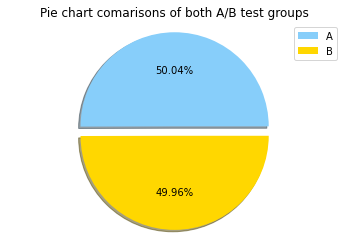

In [25]:
# plotting a pie chart to show the representation of this information
plt.figure()
explode = (0.1, 0)
plt.pie(ab_counts['counts'], autopct= '%0.2f%%', shadow=True, explode=explode, colors = ['lightskyblue', 'gold'])
plt.axis('equal')
plt.legend(['A', 'B'])
plt.title('Pie chart comarisons of both A/B test groups')
# plt.savefig('Pie chart comarisons of both A/B test groups')
plt.show()

### STEP 2: Who picks up an Application
Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

I'll start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [27]:
df['is_application'] = df.application_date.apply(lambda x: 'Application' if pd.notnull(x) else 'No Application')

display(df.head())

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A,No Application
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A,No Application
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A,No Application


In [30]:
# count how many people in Group A and B that do or don't pick up an application
app_counts = df.groupby(['ab_test_group', 'is_application']).gender.count().reset_index()

app_counts.rename(columns={'gender': 'counts'}, inplace=True)
display(app_counts)

,ab_test_group,is_application,counts
0,A,Application,250
1,A,No Application,2254
2,B,Application,325
3,B,No Application,2175


In [31]:
# Calculating the percentage in each group who complete the application, it will be easier to do that by pivoting the app_counts table
app_pivot = app_counts.pivot(
    columns = 'is_application',
    index = 'ab_test_group',
    values= 'counts').reset_index()
display(app_pivot)

is_application,ab_test_group,Application,No Application
0,A,250,2254
1,B,325,2175


In [32]:
# Creating a new Total column to sum up application and No application in both groups
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']
display(app_pivot)

is_application,ab_test_group,Application,No Application,Total
0,A,250,2254,2504
1,B,325,2175,2500


In [33]:
# Calculate another column called Percent with Application, which is equal to Application divided by Total.
app_pivot['Percent with Application'] = app_pivot['Application']/app_pivot['Total']

display(app_pivot)

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


We can see that more people from `Group B` turned in an Application, Could it be by random chance or was there a significant difference?. we'd fiind out by running a significance test on both groups to find the p-value

In [36]:
# using a chi-squared hypothesis test
from scipy.stats import chi2_contingency
x = [[250, 2254],
     [325, 2175]]

chi2, pval, dof, expected = chi2_contingency(x)
if pval < 0.05:
    print('The p_value is ' + str(round(pval, 6)) + ' which means that the event that more people in Group B turned in an application DID NOT occur at random chance')

The p_value is 0.000965 which means that the event that more people in Group B turned in an application DID NOT occur at random chance


### STEP 3: who purchases a Membership
For those who picked up an application, how many purchased a membership?

In [38]:
# create a column in df named is_member, Member for those who purchased and Not member for those who didnt
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notnull(x) else 'Not Member')

display(df.head())

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A,No Application,Not Member
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A,No Application,Not Member
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A,No Application,Not Member


In [39]:
# create a dataframe named just_apps that contains people who picked up an application
just_apps = df[df['is_application'] == 'Application']
display(just_apps)

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
9,Salvador,Cardenas,male,SCardenas1980@gmail.com,7-1-17,2017-07-07,2017-07-06,None,A,Application,Not Member
11,Valerie,Munoz,female,VMunoz1998@gmail.com,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
35,Michael,Burks,male,MB9820@gmail.com,7-1-17,None,2017-07-07,2017-07-13,B,Application,Member
...,...,...,...,...,...,...,...,...,...,...,...
4944,Frances,Kerr,female,FK7982@gmail.com,9-8-17,2017-09-12,2017-09-10,2017-09-15,A,Application,Member
4964,Raymond,Cantrell,male,Raymond.Cantrell@gmail.com,9-9-17,None,2017-09-13,2017-09-18,B,Application,Member
4972,Roberta,Acevedo,female,RA8063@gmail.com,9-9-17,None,2017-09-15,2017-09-16,B,Application,Member
4991,Suzanne,Humphrey,female,SuzanneHumphrey4@gmail.com,9-9-17,2017-09-09,2017-09-13,2017-09-18,A,Application,Member


Using a `groupby` to find out how many people in `just_apps` are and aren't members from each group by following the same process that in Step 2, including pivoting the data.

In [40]:
just_appscount = just_apps.groupby(['ab_test_group', 'is_member']).gender.count().reset_index()
just_appscount.rename(columns={'gender':'counts'}, inplace=True)

member_pivot = just_appscount.pivot(
                    columns = 'is_member',
                    index = 'ab_test_group',
                    values = 'counts').reset_index()
member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot['Member']/member_pivot['Total']
display(member_pivot)

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


It looks like people who took the fitness test were more likely to purchase a membership if they picked up an application. Why might that be?

Just like before, we'd need to know if this difference is statistically significant, hence i'd use a chi-square significance test.

In [46]:
from scipy.stats import chi2_contingency
contingency = [[200, 50],
               [250, 75]]

chi2, pval, dof, expected = chi2_contingency(contingency)
if pval < 0.05:
    print('The p value is ' + str(pval) + ', this means that the difference is statistically significant and did not occur by random chance')
else:
    print('The p value is ' + str(pval) + ', this means that the difference is NOT statistically significant and it occured by random chance')

The p value is 0.43258646051083327, this means that the difference is NOT statistically significant and it occured by random chance


Previously, we looked at what percent of people who picked up applications purchased memberships. What we really care about is what percentage of all visitors purchased memberships. Return to `df` and do a groupby to find out how many people in `df` are and aren't members from each group. Follow the same process that we did in Step 3, including pivoting the data.

In [50]:
visitors = df.groupby(['ab_test_group', 'is_member']).gender.count().reset_index()
visitors.rename(columns={'gender': 'counts'}, inplace=True)
final_member_pivot = visitors.pivot(
            columns = 'is_member',
            index = 'ab_test_group',
            values = 'counts').reset_index()

final_member_pivot['Total'] = final_member_pivot['Member'] + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot['Member']/final_member_pivot['Total']
display(final_member_pivot)

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


Previously, when we only considered people who had *already picked up an application*, we saw that there was no significant difference in membership between Group A and Group B.

Now we do a test for all people who **vist MuscleHub**, to check if there was a significant difference between who purchased or did not purchase.

In [51]:
from scipy.stats import chi2_contingency
final = [[200, 2304],
         [250, 2250]]

chi2, pval, dof, expected = chi2_contingency(final)

if pval < 0.05:
    print('The p value is ' + str(pval) + ', this means that the difference is statistically significant and did not occur by random chance')

The p value is 0.014724114645783203, this means that the difference is statistically significant and did not occur by random chance


### STEP 4: Summarize the Acquisiton Funnel with a Chart
We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

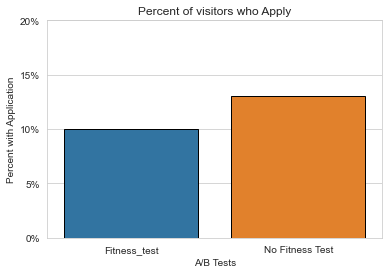

In [55]:
#Percent of visitors who Apply

plt.figure()
sns.set_style('whitegrid')
ax = plt.subplot()
sns.set_style('whitegrid')
sns.barplot(data=app_pivot, x='ab_test_group', y='Percent with Application', edgecolor='k')
ax.set_xticks(range(len(app_pivot['ab_test_group'])))
ax.set_xticklabels(['Fitness_test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.xlabel('A/B Tests')
plt.title('Percent of visitors who Apply')
plt.savefig('Percent of visitors who Apply')
plt.show()

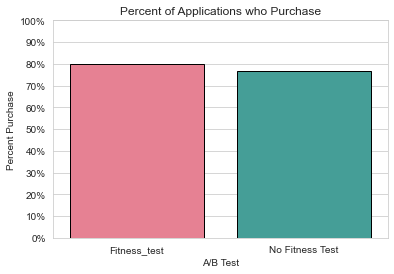

In [53]:
plt.close()
sns.set_style('whitegrid')
#Percent of Applications who Purchase
f, ax = plt.subplots()
sns.barplot(data=member_pivot, x='ab_test_group', y = 'Percent Purchase', palette='husl', edgecolor='k')
ax.set_xticks(range(len(member_pivot['ab_test_group'])))
ax.set_xticklabels(['Fitness_test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.xlabel('A/B Test')
plt.title('Percent of Applications who Purchase')
plt.savefig('Percent of Applications who Purchase')
plt.show()

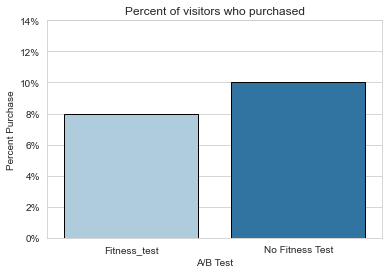

In [54]:
plt.close()
sns.set_style('whitegrid')
# Percent of visitors who purchased
f, ax = plt.subplots()
sns.barplot(data=final_member_pivot, x= 'ab_test_group', y='Percent Purchase', palette = 'Paired', edgecolor='k')
ax.set_xticks(range(len(final_member_pivot['ab_test_group'])))
ax.set_xticklabels(['Fitness_test', 'No Fitness Test'])
ax.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
ax.set_yticklabels(['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%'])
plt.xlabel('A/B Test')
plt.title('Percent of visitors who purchased')
plt.savefig('Percent of visitors who purchased')
plt.show()
